In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/character-predictions_pose.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   plod               1946 non-null   float64
 2   name               1946 non-null   object 
 3   title              938 non-null    object 
 4   male               1946 non-null   int64  
 5   culture            677 non-null    object 
 6   dateOfBirth        433 non-null    float64
 7   DateoFdeath        444 non-null    float64
 8   mother             21 non-null     object 
 9   father             26 non-null     object 
 10  heir               23 non-null     object 
 11  house              1519 non-null   object 
 12  spouse             276 non-null    object 
 13  book1              1946 non-null   int64  
 14  book2              1946 non-null   int64  
 15  book3              1946 non-null   int64  
 16  book4              1946 

In [4]:
df.head()

,S.No,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [5]:
df['title'].value_counts(normalize=True).reset_index()['title'].sum()

"SerMaesterArchmaesterLordSeptonWinterfellPrincessLadySeptaPrinceLord Commander of the Night's WatchKing in the NorthCupbearerGrand MaesterKhalBloodriderWisdomEyrieCasterly RockKing-Beyond-the-WallKnightPrince of DragonstoneHarrenhalLord of the TidesHand of the KingRiverrunKarholdBitterbridgeLord Paramount of the ManderLast HearthHighgardenColdmoatStarpikeDuskendaleLord of HarrenhalQueenBrotherCastellanFirst RangerPrincessQueenStewardHightowerRunestoneAndalsSunspearCragGoldengroveCerwynMaster of CoinNightsongStonehelmLord Reaper of PykeKhalKo (formerly)Lord of SouthshieldAcorn HallYronwoodMaster of coinBlackcrownGolden ToothBrightwaterSeagardCaptain of the guardHornwoodBarrowtonLordsportKhalakkaGood MasterStokeworthKingSeneschalGoodwifeAshfordPrince of DorneStorm's EndLord Paramount of the TridentLadyQueenKeeper of the Gates of the MoonArborWarlockFirst BuilderRed JesterRain HouseLord of OakenshieldSandshipCastellan of HarrenhalLord of the CrossingRed Flower ValeLord of HellholtSalt Sh

In [6]:
df.shape[0]

1946

Column preprocessing ideas:

* name: Drop.

* title: Use instances with a number of instances above a certain threshold.

* plod: Drop (target variable probability).

* culture: Use instances with a number of instances above a certain threshold.

* mother: Extract the family name.

* father: Extract the family name.

* heir: Could be dropped.

* house: Use instances with a number of instances above a certain threshold.

* spouse: Extract the family name (or drop).

* isAliveMother: Could be dropped.

* isAliveFather: Could be dropped.

* isAliveHeir: Could be dropped.

* isAliveSpouse: Could be dropped.

In [7]:
df.isna().mean()

S.No                 0.000000
plod                 0.000000
name                 0.000000
title                0.517986
male                 0.000000
culture              0.652107
dateOfBirth          0.777492
DateoFdeath          0.771840
mother               0.989209
father               0.986639
heir                 0.988181
house                0.219424
spouse               0.858171
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother        0.989209
isAliveFather        0.986639
isAliveHeir          0.988181
isAliveSpouse        0.858171
isMarried            0.000000
isNoble              0.000000
age                  0.777492
numDeadRelations     0.000000
boolDeadRelations    0.000000
isPopular            0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [36]:
def preprocess_inputs(df):

  df = df.copy()

  # Drop columns

  drop_cols = ['S.No',
               'plod',
               'name',
               'heir',
               'isAliveMother',
               'isAliveFather',
               'isAliveHeir',
               'isAliveSpouse',
               'father',
               'mother',
               'spouse',
               'age',
               'DateoFdeath']

  df = df.drop(drop_cols,axis=1)


  # Fill NaN values

  df['title'] = df['title'].fillna('No Title')
  df['house'] = df['house'].fillna('No House')
  df['dateOfBirth'] = df['dateOfBirth'].fillna(df['dateOfBirth'].median())
  df['culture'] = df['culture'].fillna('Unknown')



  # Group less frequent instances
  '''
  less_frequent_cols = ['title','culture','house']

  keep_instances_dict = {}

  for col in less_frequent_cols:
    keep_instances = df[col].value_counts(normalize=True).reset_index().head(11).index.tolist()

    keep_instances_dict[col] = keep_instances

    df[col] = df[col].apply(lambda x: x if x in keep_instances_dict[col] else 'Other')
   '''

  return df

In [37]:
X = preprocess_inputs(df)

X.isna().sum()

title                0
male                 0
culture              0
dateOfBirth          0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

In [10]:
X

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Other,1,Other,268.0,Other,0,0,0,0,0,0,0,11,1,1,0.605351,0
1,Other,1,Other,208.0,Other,1,1,1,1,1,1,1,1,1,1,0.896321,1
2,Other,1,Other,268.0,Other,0,0,0,1,0,0,1,0,0,0,0.267559,1
3,Other,0,Other,82.0,Other,0,0,0,0,0,1,1,0,0,0,0.183946,0
4,Other,0,Other,276.0,Other,0,0,0,1,0,1,1,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,Other,1,Other,268.0,Other,1,1,1,1,1,0,0,0,0,1,0.351171,0
1942,Other,1,Other,268.0,Other,0,1,0,1,1,0,0,0,0,0,0.096990,0
1943,Other,1,Other,268.0,Other,1,1,1,1,1,0,0,0,0,0,0.030100,1
1944,Other,1,Other,268.0,Other,0,0,1,1,1,0,0,0,0,0,0.130435,1


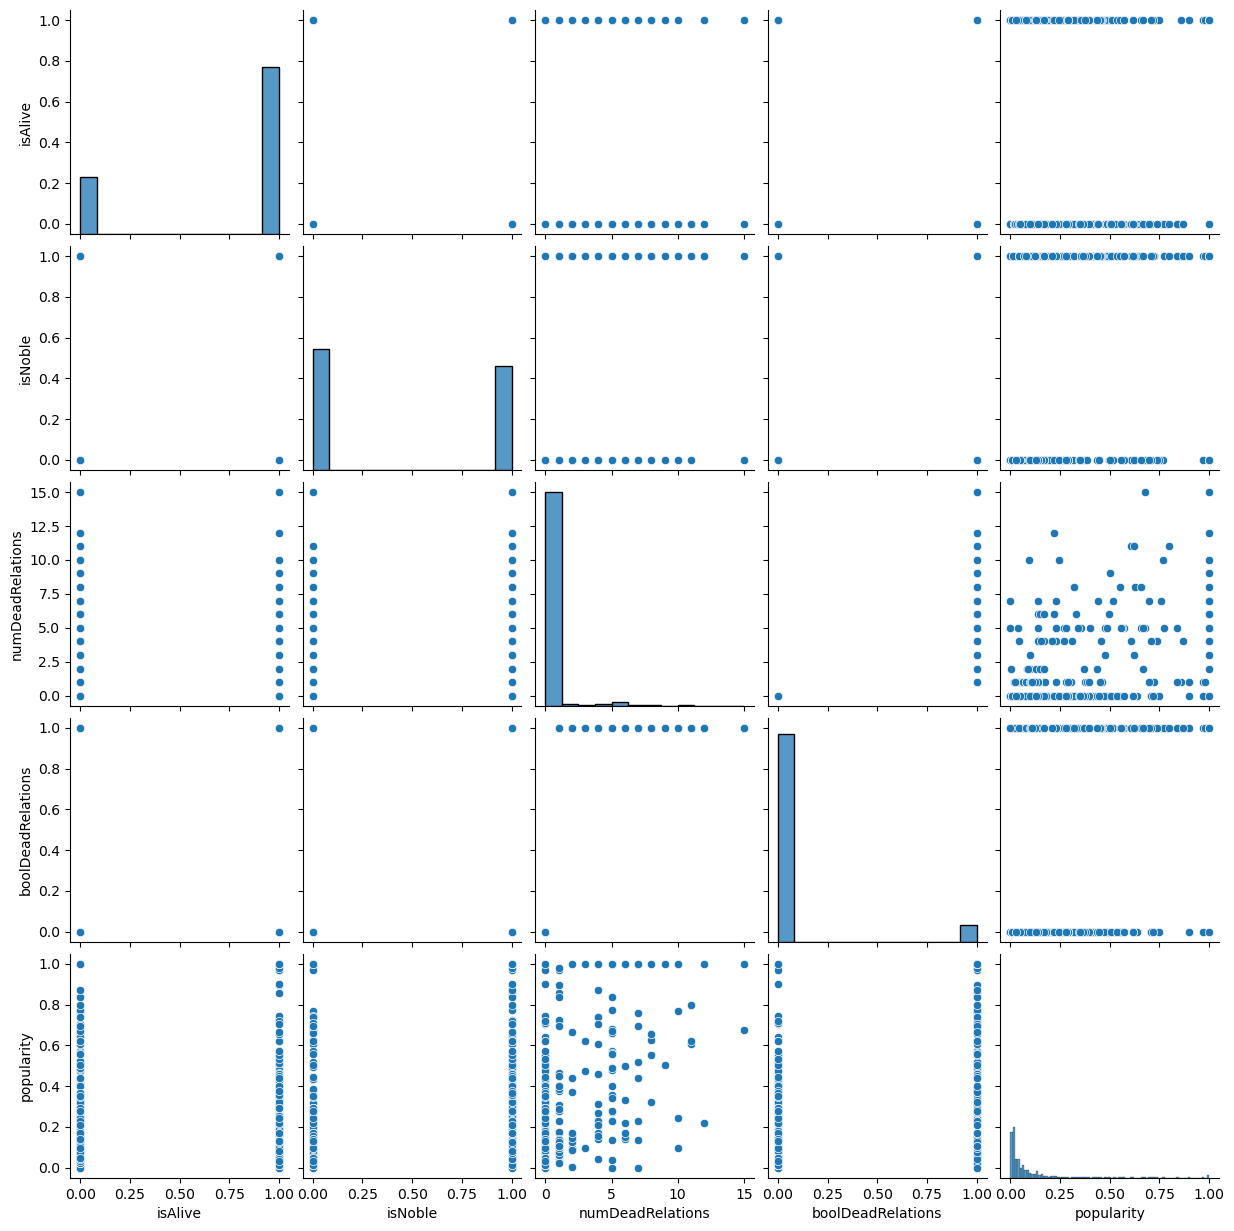

In [11]:
sns.pairplot(X.select_dtypes(['int','float'])[['isAlive','isNoble','numDeadRelations','boolDeadRelations','popularity']])

In [75]:
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(X.corr()[['isAlive']].sort_values(by='isAlive', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Features Correlating isAlive', fontdict={'fontsize':18}, pad=16)

ValueError: could not convert string to float: 'No Title'

<Figure size 600x1000 with 0 Axes>

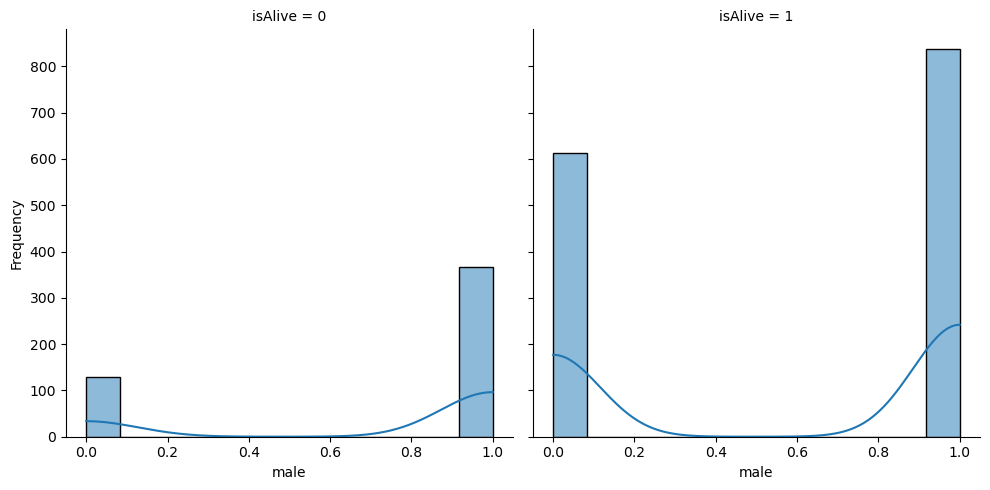

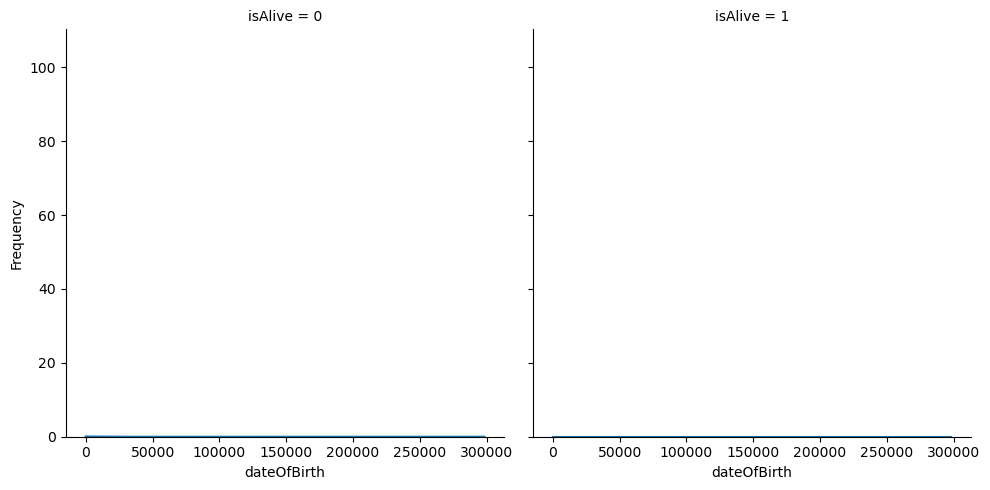

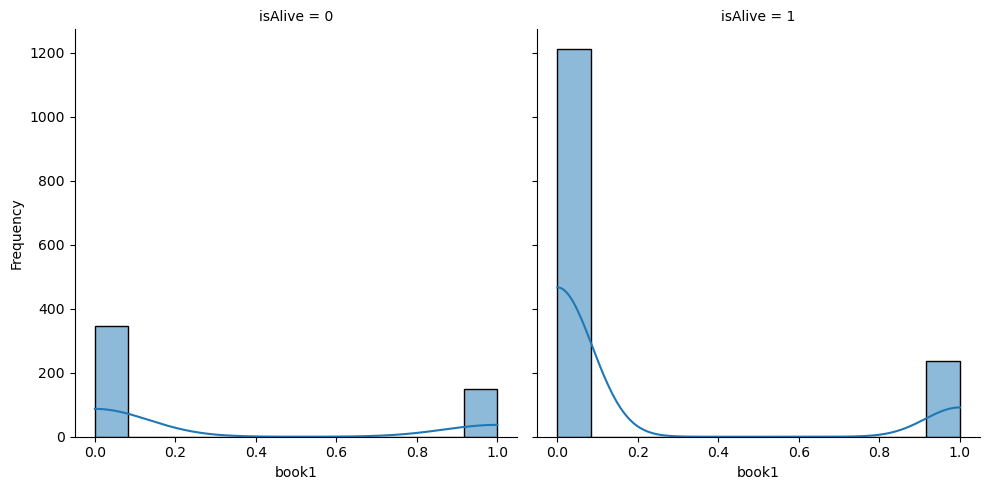

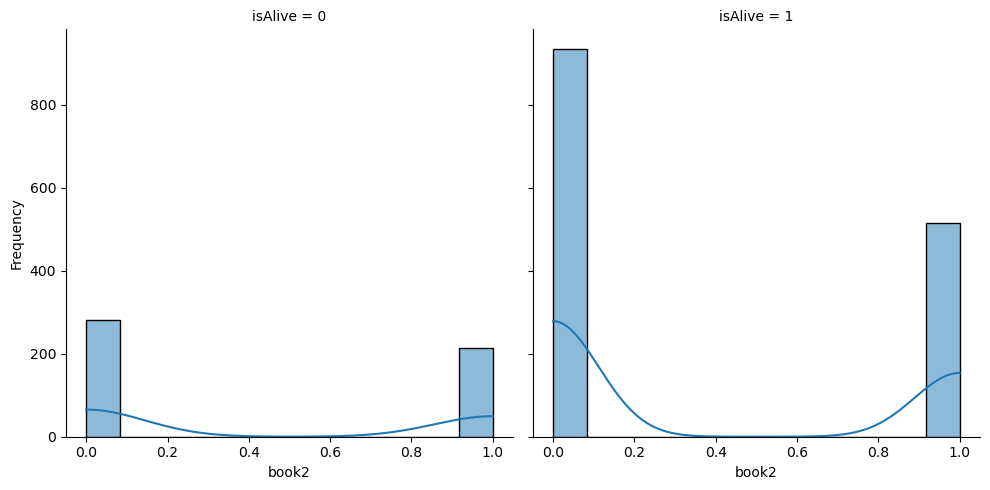

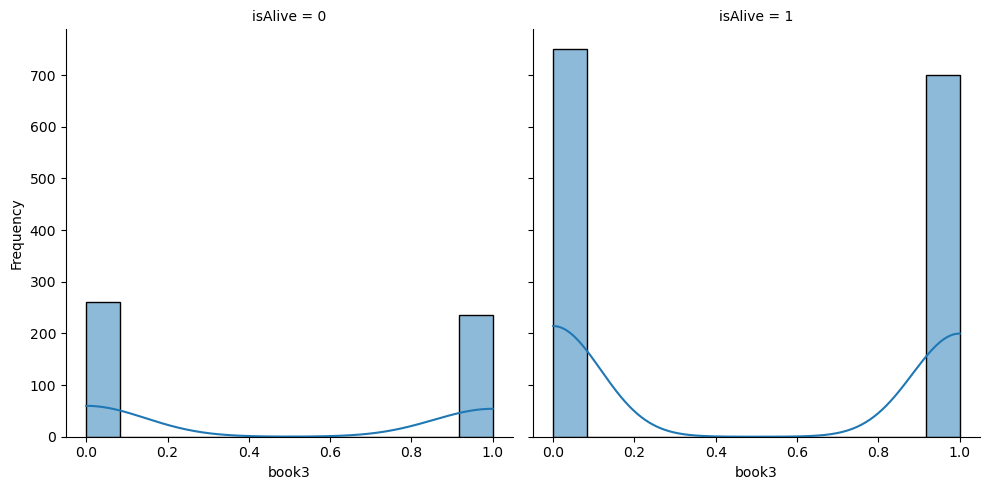

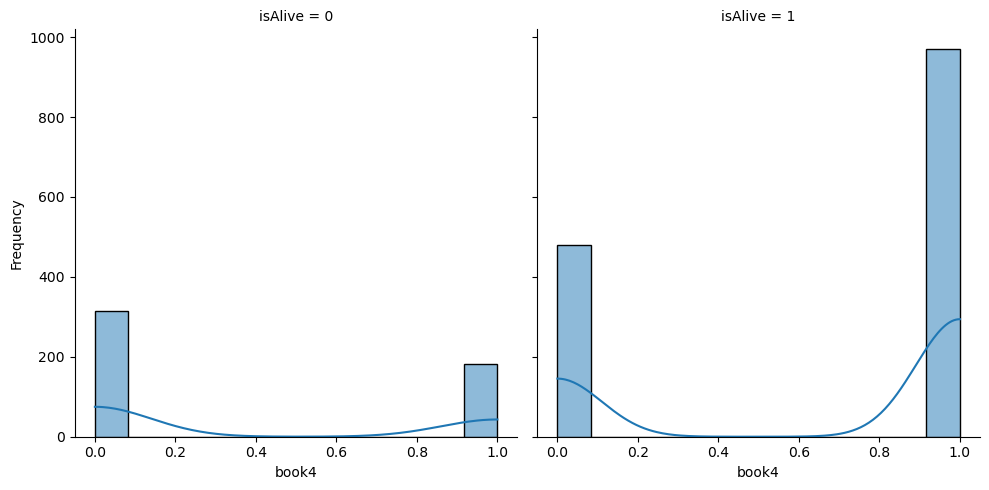

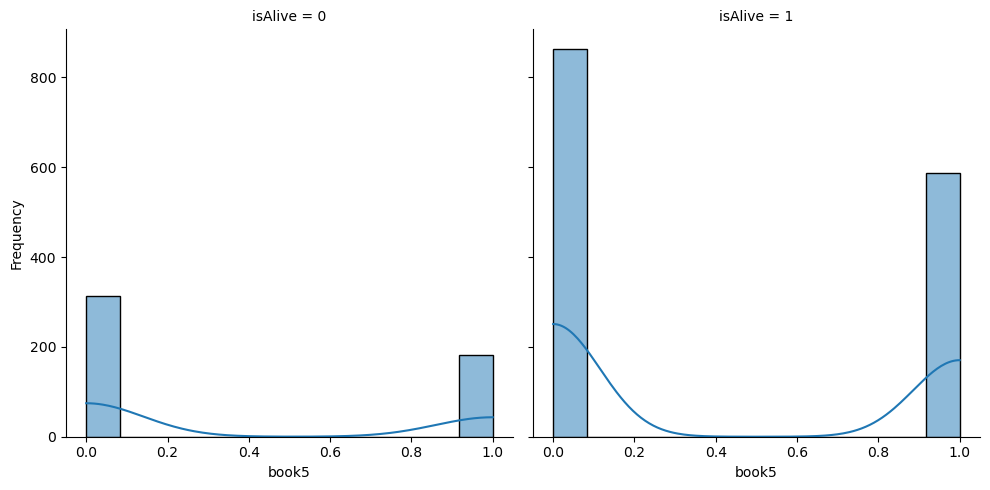

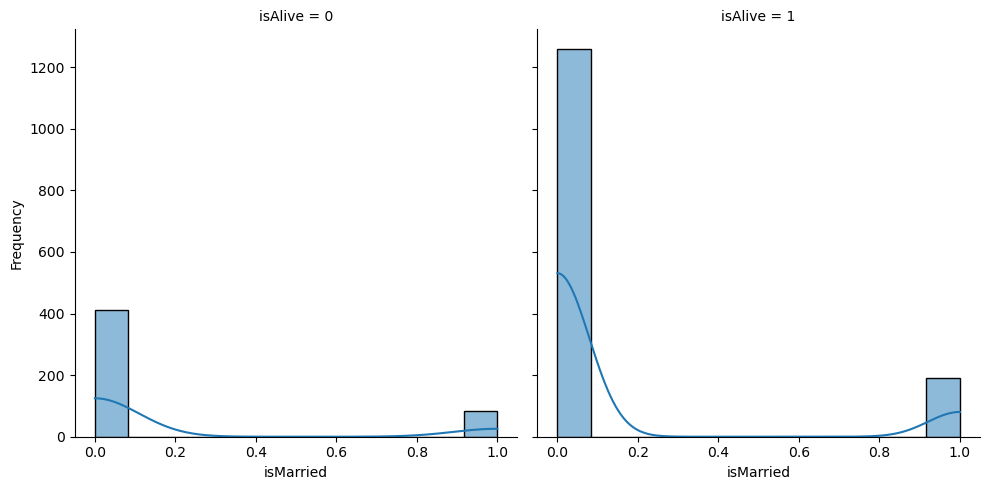

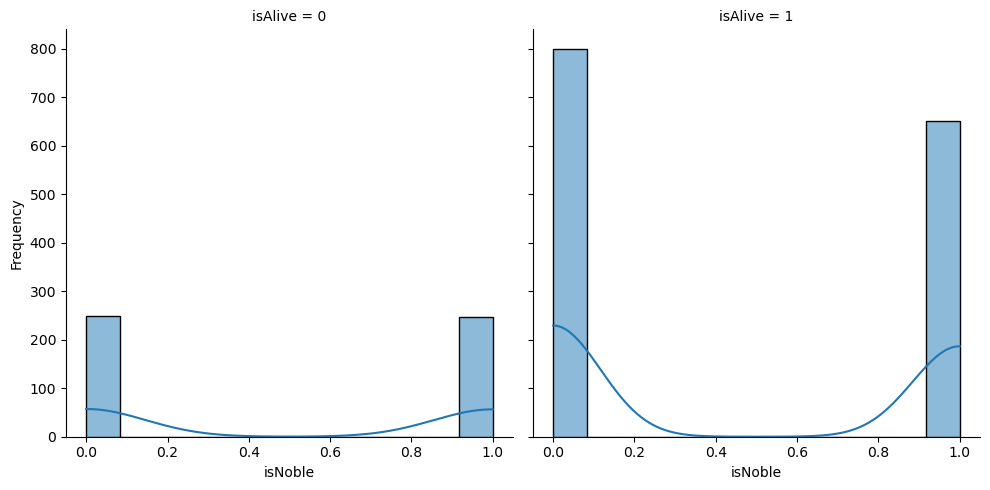

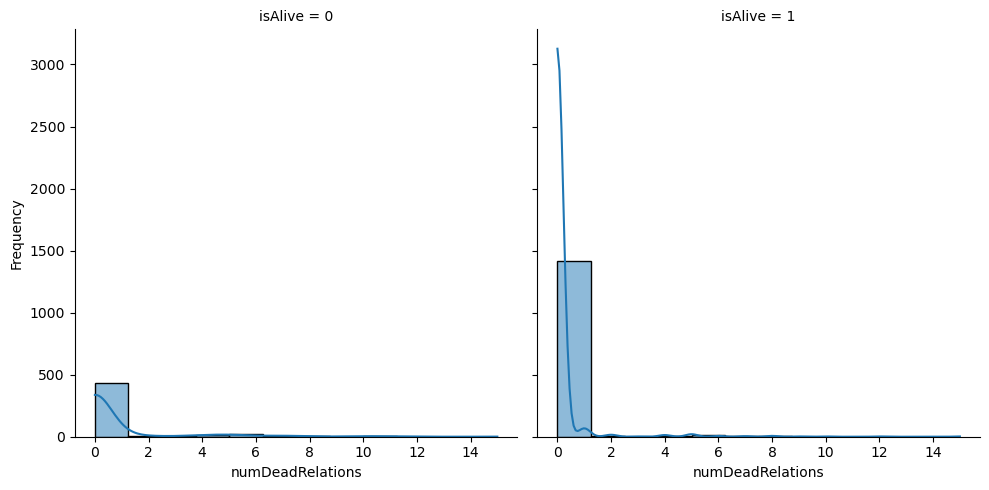

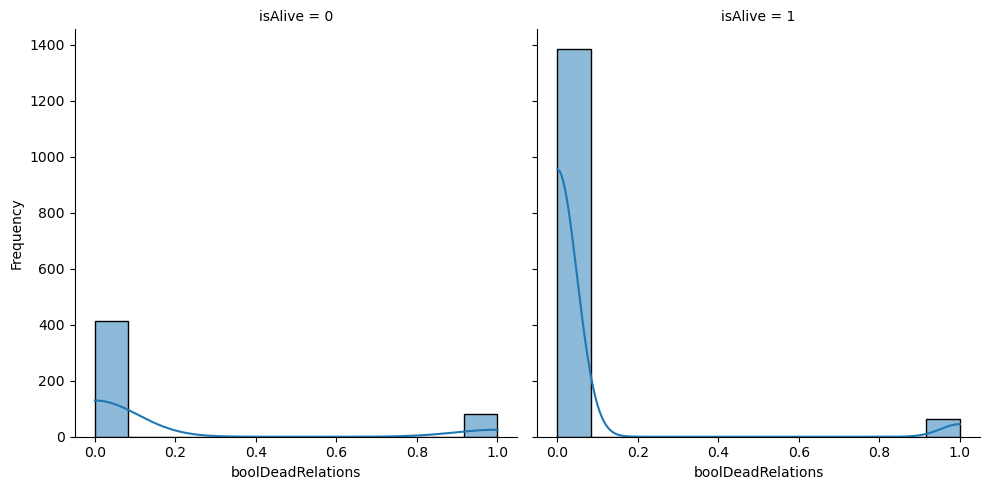

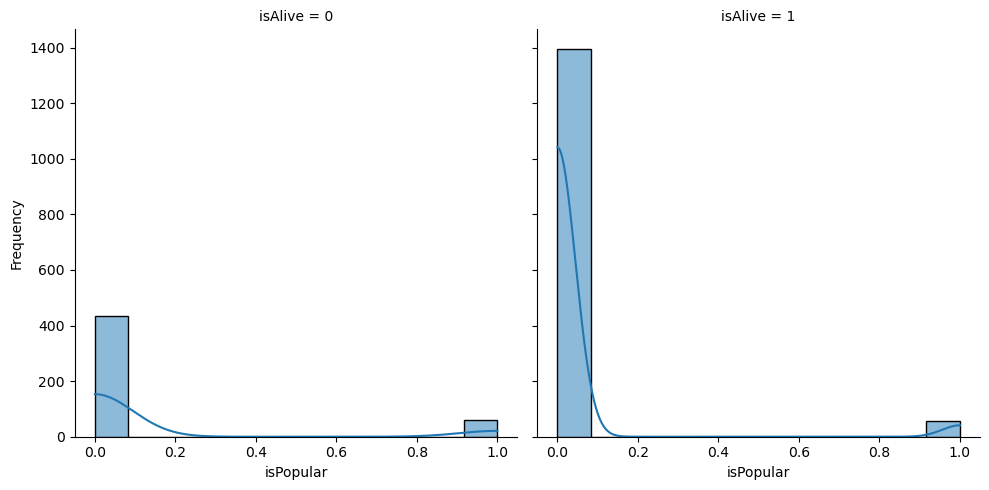

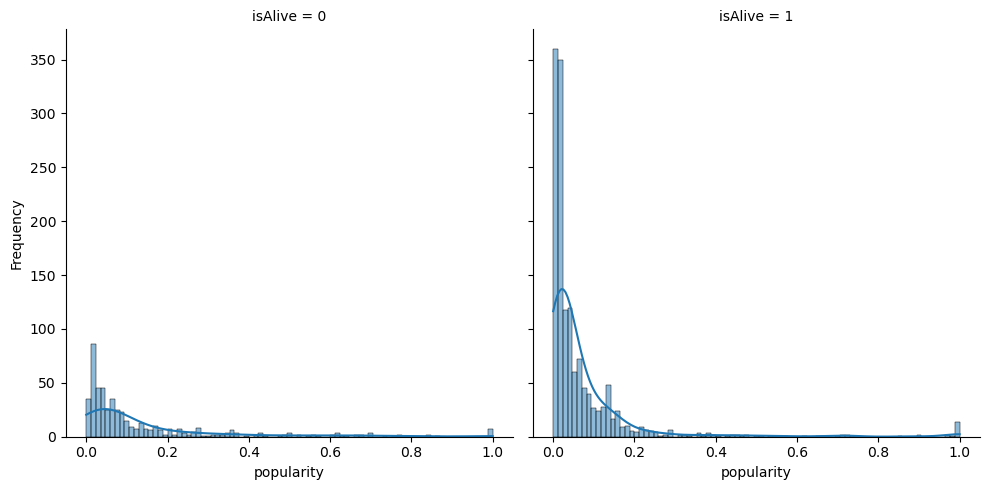

In [13]:
for column in X.drop('isAlive', axis=1).select_dtypes(['int','float']):
    g = sns.displot(df, x=column, col='isAlive', kde=True)
    g.set_axis_labels(f"{column}", "Frequency")
    plt.show()

# Modeling
1. build data pipeline
2. test dummy model, svm, knn, lr model
3. random search for the best para
4. run test set on best model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.model_selection import RandomizedSearchCV

In [38]:
X.nunique()

title                263
male                   2
culture               65
dateOfBirth          134
house                348
book1                  2
book2                  2
book3                  2
book4                  2
book5                  2
isMarried              2
isNoble                2
numDeadRelations      14
boolDeadRelations      2
isPopular              2
popularity           166
isAlive                2
dtype: int64

## data pipeline
- Dead is the positive class in our case

In [49]:
y = df["isAlive"]
y = y.map({0: 1, 1: 0}) #positive class is the dead character 
X = preprocess_inputs(df)
X.drop("isAlive", inplace=True, axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [51]:
numeric_features = [
    "dateOfBirth"
]
categorical_features = [
    "title", 
    "culture",
    "house"
]
passthrough_features = [
    'male',
    'book1',
    'book2',
    'book3',
    'book4',
    'book5',
    'isMarried',
    'isNoble',
    'numDeadRelations',
    'boolDeadRelations',
    'isPopular',
    'popularity'
]
target = "isAlive"

# Create the column transformer
numeric_transformer = StandardScaler()
categorical_transformer =  OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary')
#binary_transformer = OneHotEncoder(sparse_output=False, dtype = int)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features), 
    ("passthrough", passthrough_features),
    (categorical_transformer, categorical_features),
)

# Show the preprocessor
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['dateOfBirth']),
                                ('passthrough', 'passthrough',
                                 ['male', 'book1', 'book2', 'book3', 'book4',
                                  'book5', 'isMarried', 'isNoble',
                                  'numDeadRelations', 'boolDeadRelations',
                                  'isPopular', 'popularity']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['title', 'culture', 'house'])])

In [52]:
X_train_enc_raw = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_enc = pd.DataFrame(X_train_enc_raw, columns=feature_names)
X_train_enc

,standardscaler__dateOfBirth,passthrough__male,passthrough__book1,passthrough__book2,passthrough__book3,passthrough__book4,passthrough__book5,passthrough__isMarried,passthrough__isNoble,passthrough__numDeadRelations,...,onehotencoder__house_Stormcrows,onehotencoder__house_Summer Islands,onehotencoder__house_The Citadel,onehotencoder__house_Thenn,onehotencoder__house_Thirteen,onehotencoder__house_Three-eyed crow,onehotencoder__house_Undying Ones,onehotencoder__house_Unsullied,onehotencoder__house_Windblown,onehotencoder__house_wildling
0,-0.024799,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.024799,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.024799,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.024799,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.022416,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,-0.024799,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1552,-0.024799,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553,-0.024799,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,-0.024799,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## modeling
- dummy
- LogisticRegression
- SVC

In [61]:
#import models
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [54]:
classification_metrics = ["accuracy", "precision", "recall", "f1"]
# The dummy model
dc = DummyClassifier()
# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results = {}
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc, X_train, y_train, scoring=classification_metrics, return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['dummy']

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\metrics\_classification

,mean,std
fit_time,0.001,0.001
score_time,0.011,0.004
test_accuracy,0.744,0.001
train_accuracy,0.744,0.000
test_precision,0.000,0.000
train_precision,0.000,0.000
test_recall,0.000,0.000
train_recall,0.000,0.000
test_f1,0.000,0.000
train_f1,0.000,0.000


In [57]:
# The logreg model pipeline
logreg_m = LogisticRegression(max_iter=1000, random_state=123)
logreg = make_pipeline(preprocessor, logreg_m)
# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, X_train, y_train, scoring=classification_metrics, return_train_score=True)).agg(['mean', 'std']).round(3).T
cross_val_results['logreg'] 

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\

,mean,std
fit_time,0.111,0.032
score_time,0.019,0.007
test_accuracy,0.776,0.020
train_accuracy,0.839,0.010
test_precision,0.636,0.094
train_precision,0.828,0.021
test_recall,0.326,0.039
train_recall,0.471,0.034
test_f1,0.427,0.037
train_f1,0.600,0.032


In [59]:
svc_m = SVC(random_state=123)
svc = make_pipeline(preprocessor, svc_m)
# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['svc'] = pd.DataFrame(cross_validate(svc, X_train, y_train, scoring=classification_metrics, return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['svc'] 

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\

,mean,std
fit_time,0.279,0.035
score_time,0.103,0.009
test_accuracy,0.781,0.021
train_accuracy,0.812,0.010
test_precision,0.787,0.062
train_precision,0.946,0.025
test_recall,0.193,0.082
train_recall,0.285,0.039
test_f1,0.305,0.108
train_f1,0.437,0.047


In [62]:
y_pred_logreg = cross_val_predict(logreg, X_train, y_train, cv=5)
confmat_logreg = confusion_matrix(y_train, y_pred_logreg)
# Show the matrix
confmat_logreg

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\

array([[1078,   79],
       [ 269,  130]], dtype=int64)

In [63]:
# 3. Confusion matrix for the SVC
y_pred_svc = cross_val_predict(svc, X_train, y_train, cv=5)
confmat_svc = confusion_matrix(y_train, y_pred_svc)
# Show the matrix
confmat_svc

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\thomas\miniconda3\envs\

array([[1138,   19],
       [ 322,   77]], dtype=int64)

In [68]:
pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
)

,dummy,logreg,svc
fit_time,0.001,0.111,0.279
score_time,0.011,0.019,0.103
test_accuracy,0.744,0.776,0.781
train_accuracy,0.744,0.839,0.812
test_precision,0.000,0.636,0.787
train_precision,0.000,0.828,0.946
test_recall,0.000,0.326,0.193
train_recall,0.000,0.471,0.285
test_f1,0.000,0.427,0.305
train_f1,0.000,0.600,0.437


## hyperparameter optimization
The best model in term of f1 score is LR model with test_f1 of 0.427.

In [84]:
param_dist = {
    "logisticregression__class_weight": [None, 'balanced'],
    "logisticregression__C": np.logspace(-7, 5, 20),
    "logisticregression__max_iter" : [100, 500, 1000, 1500, 2000]
}
svc_pipe = make_pipeline(preprocessor, LogisticRegression(random_state=123))
random_search = RandomizedSearchCV(
    svc_pipe,
    param_dist,
    n_jobs=-1,
    n_iter=40,
    cv=5,
    scoring="f1",
    return_train_score=True,
    random_state=123
)

In [85]:
random_search.fit(X_train, y_train)
best_params = random_search.best_params_

In [86]:
results = pd.DataFrame(random_search.cv_results_)
sorted_results = results.sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)
sorted_results.loc[:4,["param_logisticregression__C",
                       "param_logisticregression__max_iter",
                       "param_logisticregression__class_weight",
                       "mean_test_score",
                       "mean_fit_time",
                       "mean_train_score"]]

,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__class_weight,mean_test_score,mean_fit_time,mean_train_score
0,0.885867,2000,balanced,0.546672,0.970964,0.666349
1,0.0,2000,balanced,0.537802,0.105135,0.527562
2,0.000002,500,balanced,0.536295,0.179532,0.528222
3,3.79269,1500,balanced,0.532742,1.498725,0.730732
4,3.79269,1000,balanced,0.532742,0.905474,0.730732


## Run test set on the best model

In [89]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [88]:
best_model = make_pipeline(preprocessor, LogisticRegression(random_state=123, class_weight= 'balanced', C= 0.8859, max_iter=2000))
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [90]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       294
           1       0.44      0.59      0.50        96

    accuracy                           0.71       390
   macro avg       0.64      0.67      0.65       390
weighted avg       0.75      0.71      0.73       390



C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


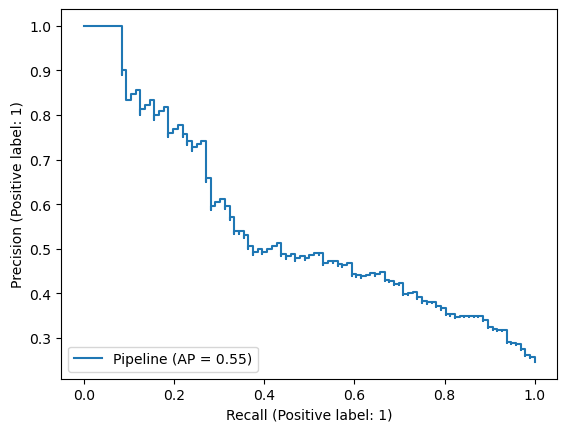

In [92]:
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)

C:\Users\thomas\miniconda3\envs\522\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


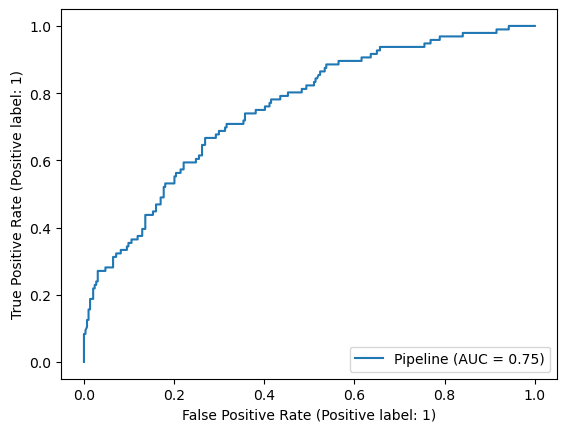

In [94]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)